In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='colorblind')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [4]:
df=pd.read_csv('C:\\Users\\mahes\\OneDrive\\Desktop\\Mahesh_Works\\Fast-Food-Nutrition\\FastFoodNutritionMenu.csv')

In [5]:
df.head()

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159 entries, 0 to 1158
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1159 non-null   object
 1   Item                  1159 non-null   object
 2   Calories              1157 non-null   object
 3   Calories from
Fat     1098 non-null   object
 4   Total Fat
(g)         1101 non-null   object
 5   Saturated Fat
(g)     1101 non-null   object
 6   Trans Fat
(g)         1101 non-null   object
 7   Cholesterol
(mg)      1157 non-null   object
 8   Sodium 
(mg)          1157 non-null   object
 9   Carbs
(g)             1101 non-null   object
 10  Fiber
(g)             1101 non-null   object
 11  Sugars
(g)            1157 non-null   object
 12  Protein
(g)           1027 non-null   object
 13  Weight Watchers
Pnts  524 non-null    object
dtypes: object(14)
memory usage: 126.9+ KB


In [7]:
df.dtypes

Company                  object
Item                     object
Calories                 object
Calories from\nFat       object
Total Fat\n(g)           object
Saturated Fat\n(g)       object
Trans Fat\n(g)           object
Cholesterol\n(mg)        object
Sodium \n(mg)            object
Carbs\n(g)               object
Fiber\n(g)               object
Sugars\n(g)              object
Protein\n(g)             object
Weight Watchers\nPnts    object
dtype: object

In [8]:
df.describe().T

,count,unique,top,freq
Company,1159,6,McDonald’s,330
Item,1159,1083,29 fl oz,11
Calories,1157,106,0,83
Calories from\nFat,1098,105,0,357
Total Fat\n(g),1101,70,0,364
Saturated Fat\n(g),1101,35,0,616
Trans Fat\n(g),1101,52,0,739
Cholesterol\n(mg),1157,153,0,182
Sodium \n(mg),1157,243,0,85
Carbs\n(g),1101,119,0,264


In [9]:
df.shape

(1159, 14)

In [10]:
df['Company'].value_counts()

Company
McDonald’s     330
KFC            218
Burger King    199
Taco Bell      183
Wendy’s        155
Pizza Hut       74
Name: count, dtype: int64

In [11]:
df.isna().sum()

Company                    0
Item                       0
Calories                   2
Calories from\nFat        61
Total Fat\n(g)            58
Saturated Fat\n(g)        58
Trans Fat\n(g)            58
Cholesterol\n(mg)          2
Sodium \n(mg)              2
Carbs\n(g)                58
Fiber\n(g)                58
Sugars\n(g)                2
Protein\n(g)             132
Weight Watchers\nPnts    635
dtype: int64

<Axes: >

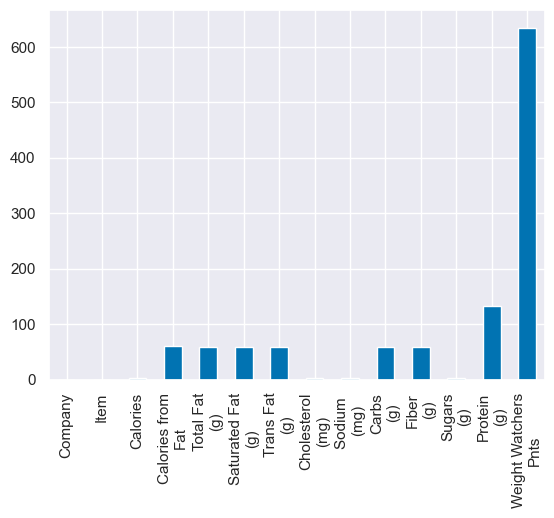

In [12]:
df.isna().sum().plot(kind = 'bar')

REMOVE NULL

In [13]:
df = df.drop('Weight Watchers\nPnts', axis=1)

In [14]:
df=df.dropna()

REMOVE DUPLICATE

In [15]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]
# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]
# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 7


,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g)
387,Burger King,Chicken Nuggets- 4pc,170,100,11,1.5,0,25,310,11,1,0,8
388,Burger King,Chicken Nuggets- 6pc,260,150,16,2.5,0,35,470,16,1,0,12
389,Burger King,Hamburger,240,90,10,3.5,0.5,35,380,26,1,6,13
390,Burger King,Cheeseburger,280,120,13,6,0.5,45,560,27,1,7,15
403,Burger King,Soft Serve Cone,190,40,4.5,3,0,20,150,32,0,24,5
442,Burger King,Fat FREE Milk (8 fl oz),90,0,0,0,0,5,125,13,0,12,9
443,Burger King,1% Low Fat Chocolate Milk (8 fl oz),160,25,2.5,1.5,0,15,150,26,0,25,8


In [16]:
df = df.drop_duplicates()

In [17]:
df.isna().sum()

Company               0
Item                  0
Calories              0
Calories from\nFat    0
Total Fat\n(g)        0
Saturated Fat\n(g)    0
Trans Fat\n(g)        0
Cholesterol\n(mg)     0
Sodium \n(mg)         0
Carbs\n(g)            0
Fiber\n(g)            0
Sugars\n(g)           0
Protein\n(g)          0
dtype: int64

visualization

In [18]:
col_conv = [ 'Calories', 'Calories from\nFat', 'Total Fat\n(g)',
       'Saturated Fat\n(g)', 'Trans Fat\n(g)', 'Cholesterol\n(mg)',
       'Sodium \n(mg)', 'Carbs\n(g)', 'Fiber\n(g)', 'Sugars\n(g)',
       'Protein\n(g)'] 
for column in col_conv:
    df[column] = pd.to_numeric(df[column], errors='coerce')

<Axes: xlabel='Company', ylabel='Total Fat\n(g)'>

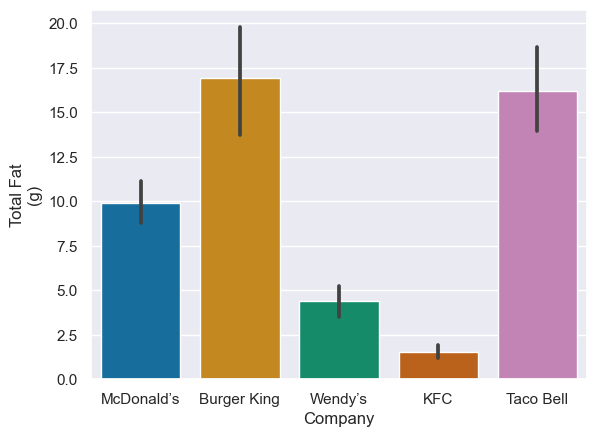

In [19]:
sns.barplot(x=df['Company'], y=df['Total Fat\n(g)'])

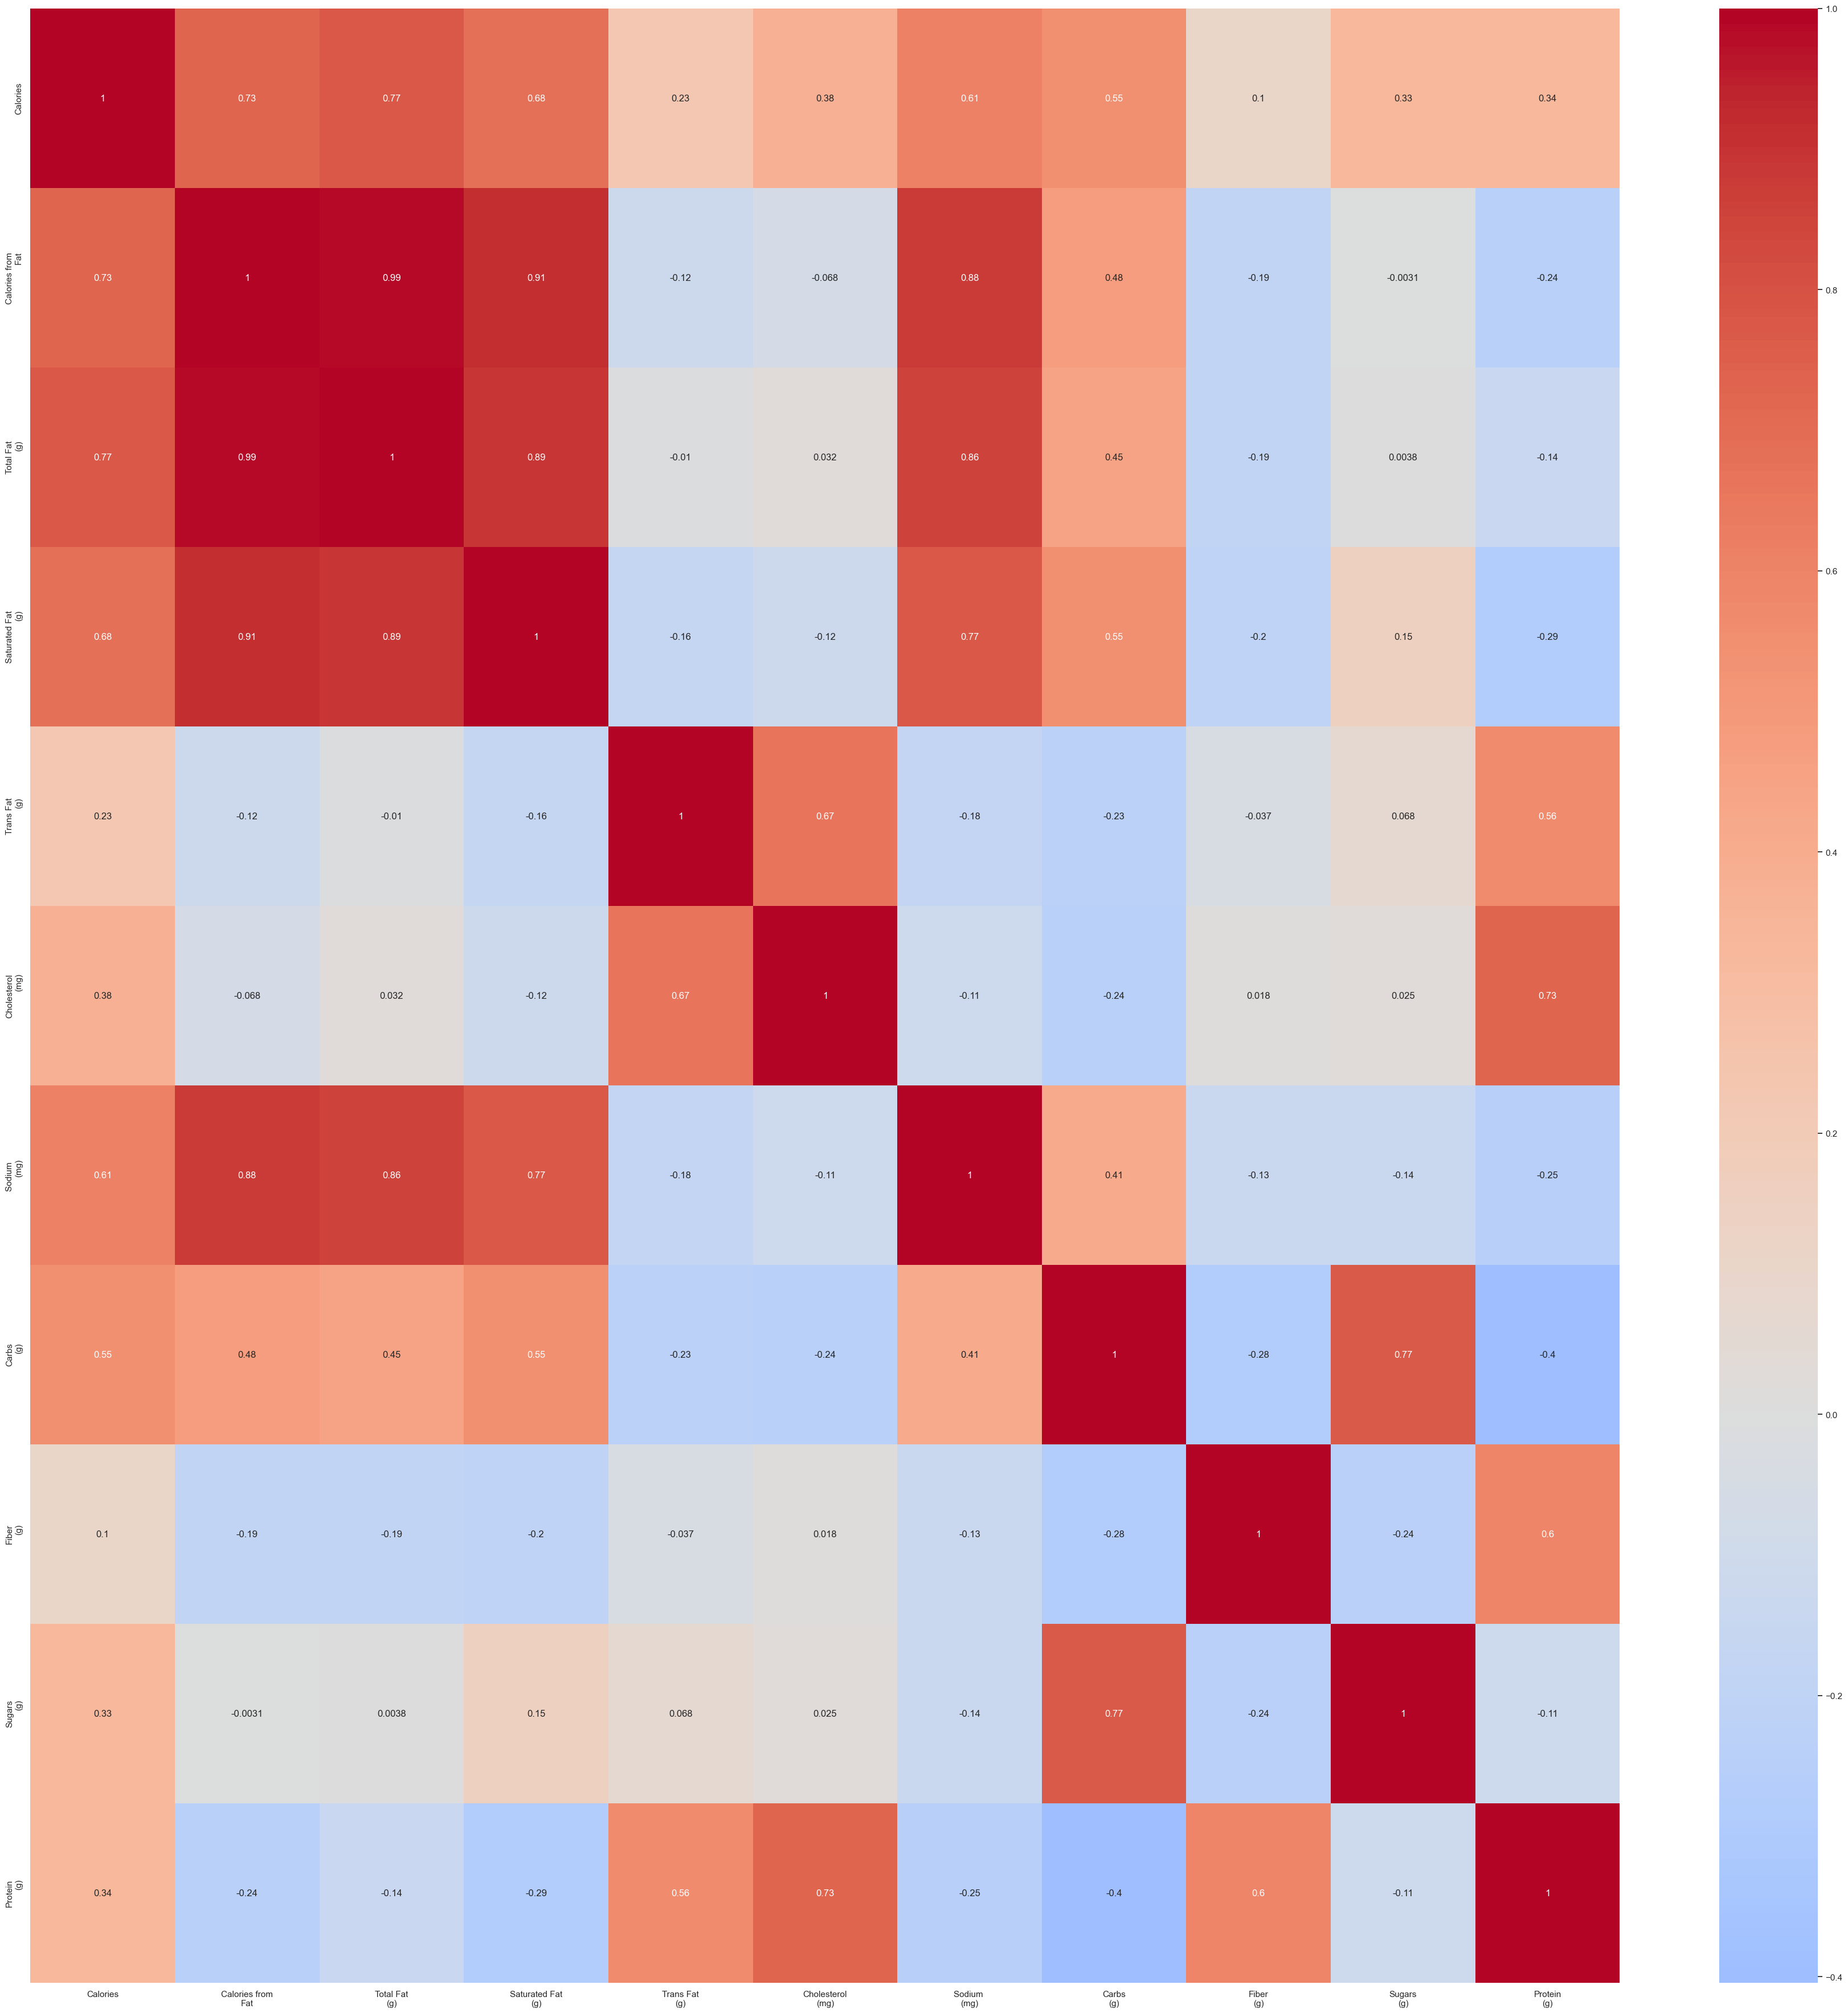

In [26]:
df1 = df.iloc[:,2:]
Corr_Matrix = df1.corr()

# Set up the figure and plot the heatmap
plt.figure(figsize=(45, 45))
sns.heatmap(Corr_Matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

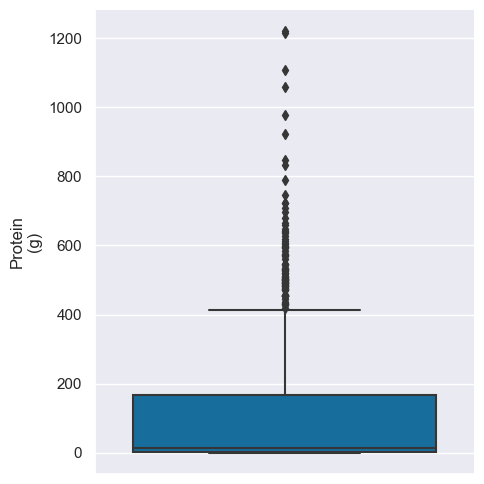

In [27]:
sns.catplot(data=df, y="Protein\n(g)",  kind="box")

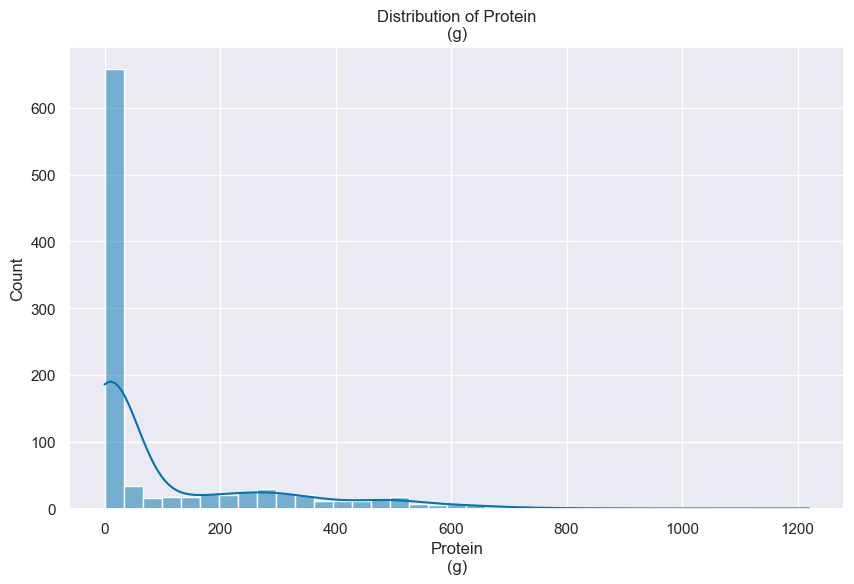

In [28]:
# Distribution of Popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['Protein\n(g)'], kde=True)
plt.title('Distribution of Protein\n(g)')
plt.xlabel('Protein\n(g)')
plt.ylabel('Count')
plt.show()

In [ ]:
def plot_correlation_heatmaps_by_company(dataframe):
    
    companies = df['Company'].unique()
    
    for company in companies:
        company_df = df[df['Company'] == company]
        corr_matrix = company_df.corr()
        
        plt.figure(figsize=(8, 6))
        
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)
        
        plt.title(f'Correlation Heatmap - {company}')
        plt.show()

plot_correlation_heatmaps_by_company(df)

In [ ]:
import plotly.express as px
companies = df['Company'].unique()
# Define nutritional columns
nutritional_columns = ['Total Fat\n(g)', 'Protein\n(g)', 'Carbs\n(g)']

# Create box plots for each nutritional column
fig = px.box(df, x='Company', y=nutritional_columns, title='Nutritional Values by Company',
             labels={'value': 'Grams'}, category_orders={'Company': companies})
fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': companies},
                  xaxis_title='Company', yaxis_title='Grams')

fig.show()

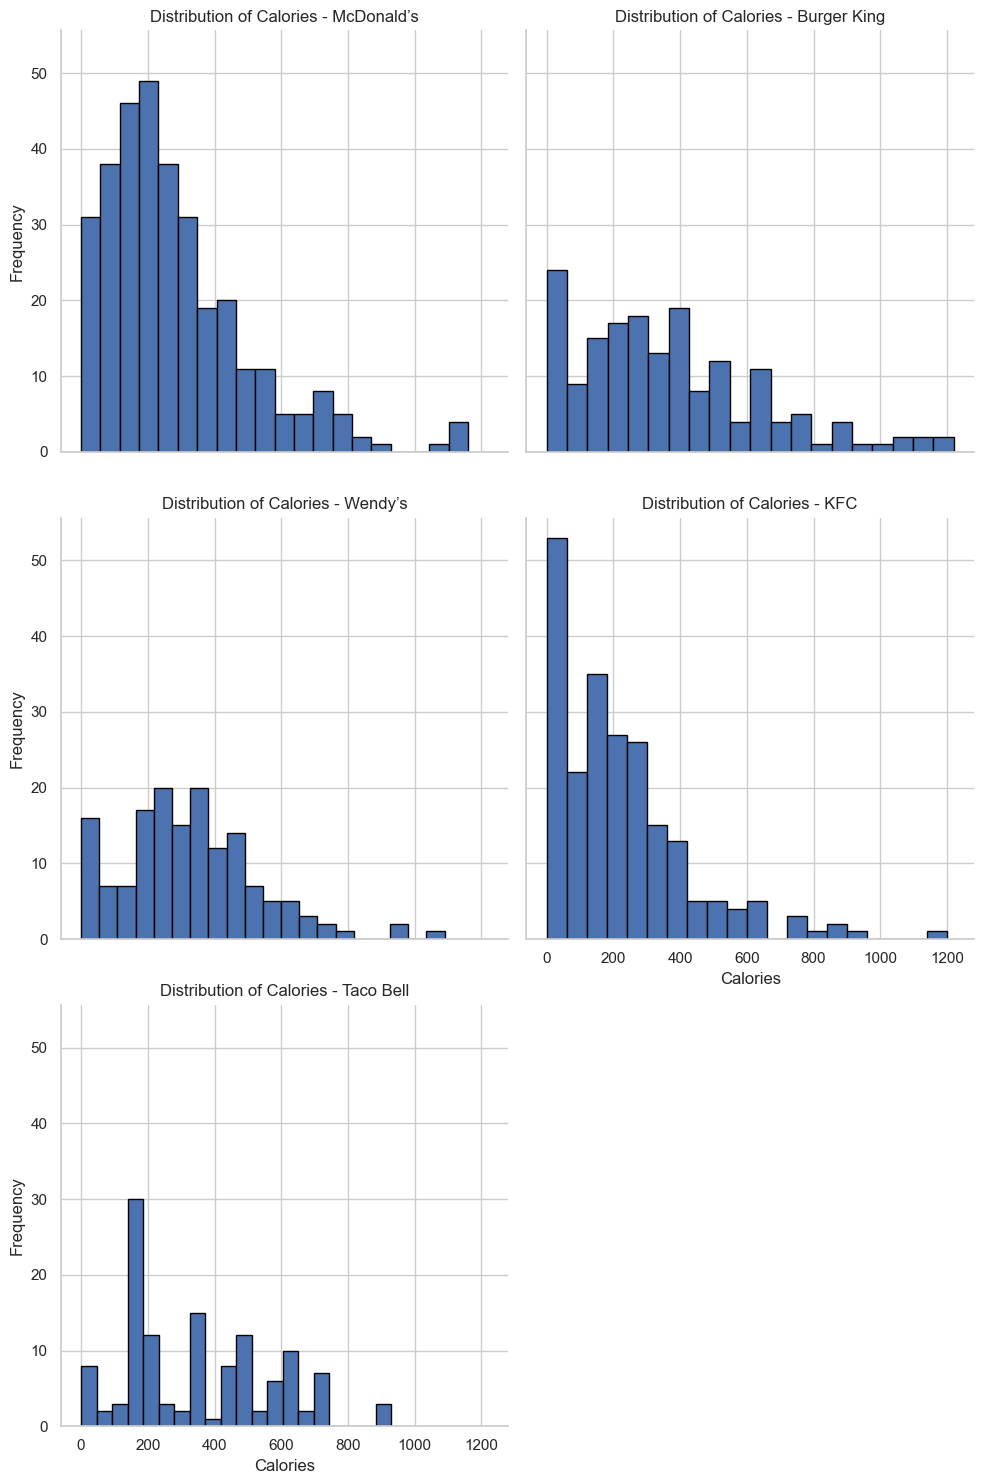

In [38]:
sns.set(style="whitegrid")
# Creating a FacetGrid
g = sns.FacetGrid(df, col="Company", col_wrap=2, height=5)
# Plotting the histogram of Calories for each company
g.map(plt.hist, 'Calories', bins=20, edgecolor='black')
g.set_titles("Distribution of Calories - {col_name}")
g.set_axis_labels("Calories", "Frequency")
plt.tight_layout()
plt.show()

In [39]:
df=df.dropna()

categorical

In [40]:
df['Company'] = le.fit_transform(df['Company'])
df['Item'] = le.fit_transform(df['Item'])

In [41]:
df.head()

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g)
0,2,370,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0
1,2,172,300.0,110.0,12.0,6.0,0.5,40.0,750.0,33.0,2.0,6.0,15.0
2,2,297,440.0,210.0,23.0,11.0,1.5,80.0,1150.0,34.0,2.0,7.0,25.0
3,2,566,390.0,170.0,19.0,8.0,1.0,65.0,920.0,33.0,2.0,7.0,22.0
4,2,0,510.0,230.0,26.0,12.0,1.5,90.0,1190.0,40.0,3.0,9.0,29.0


Top 5 Most Positively Correlated

In [42]:
print('Top 5 Most Positively Correlated to the Target Variable')
Corr_Matrix['Total Fat\n(g)'].sort_values(ascending=False).head(5)

Top 5 Most Positively Correlated to the Target Variable


Total Fat\n(g)        1.000000
Calories from\nFat    0.986373
Saturated Fat\n(g)    0.893753
Sodium \n(mg)         0.856355
Calories              0.773533
Name: Total Fat\n(g), dtype: float64

Top 5 Most Negatively Correlated

In [43]:
print('Top 5 Most Negatively Correlated to the Target Variable')
Corr_Matrix['Total Fat\n(g)'].sort_values(ascending=True).head(5)

Top 5 Most Negatively Correlated to the Target Variable


Fiber\n(g)          -0.192907
Protein\n(g)        -0.143426
Trans Fat\n(g)      -0.010390
Sugars\n(g)          0.003783
Cholesterol\n(mg)    0.031759
Name: Total Fat\n(g), dtype: float64

DROP LOW Correlated

In [44]:
columns_to_drop = [col for col in Corr_Matrix.columns if abs(Corr_Matrix.loc['Total Fat\n(g)', col]) < 0.5]
columns_to_drop

['Trans Fat\n(g)',
 'Cholesterol\n(mg)',
 'Carbs\n(g)',
 'Fiber\n(g)',
 'Sugars\n(g)',
 'Protein\n(g)']

In [45]:
df = df.drop(columns_to_drop, axis=1)
df.shape

(958, 7)

In [46]:
df=df.dropna()

split

In [47]:
X = df.drop(columns=['Total Fat\n(g)'])
y = df['Total Fat\n(g)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (766, 6)
X_test shape: (192, 6)
y_train shape: (766,)
y_test shape: (192,)


MODEL

In [48]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}
best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual Price'] = y_test
    submit['Predict_price'] = y_pred
    submit = submit.reset_index()
    print(submit.head(8))
    r2 = r2_score(y_test, y_pred)

    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__

    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print('----------------------------------------')
print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

   index  Actual Price  Predict_price
0    885           0.0      -0.667609
1    505           0.0      -0.265401
2    356          52.0      50.771840
3    947          27.0      27.575316
4    905          12.0      12.392847
5    266           5.0       5.468171
6    219           0.0       0.449149
7    340          84.0      82.080301
Linear Regression:
R2 Score: 0.97
Mean Absolute Error (MAE): 1.18
Root Mean Squared Error (RMSE): 2.29
----------------------------------------
   index  Actual Price  Predict_price
0    885           0.0          0.000
1    505           0.0          0.000
2    356          52.0         51.340
3    947          27.0         26.930
4    905          12.0         12.010
5    266           5.0          5.215
6    219           0.0          0.000
7    340          84.0         77.470
Random Forest:
R2 Score: 0.98
Mean Absolute Error (MAE): 0.63
Root Mean Squared Error (RMSE): 1.81
----------------------------------------
   index  Actual Price  Predict_

feature_importances

Calories from
Fat: 0.98
Calories: 0.01
Company: 0.01
Saturated Fat
(g): 0.00
Item: 0.00
Sodium 
(mg): 0.00


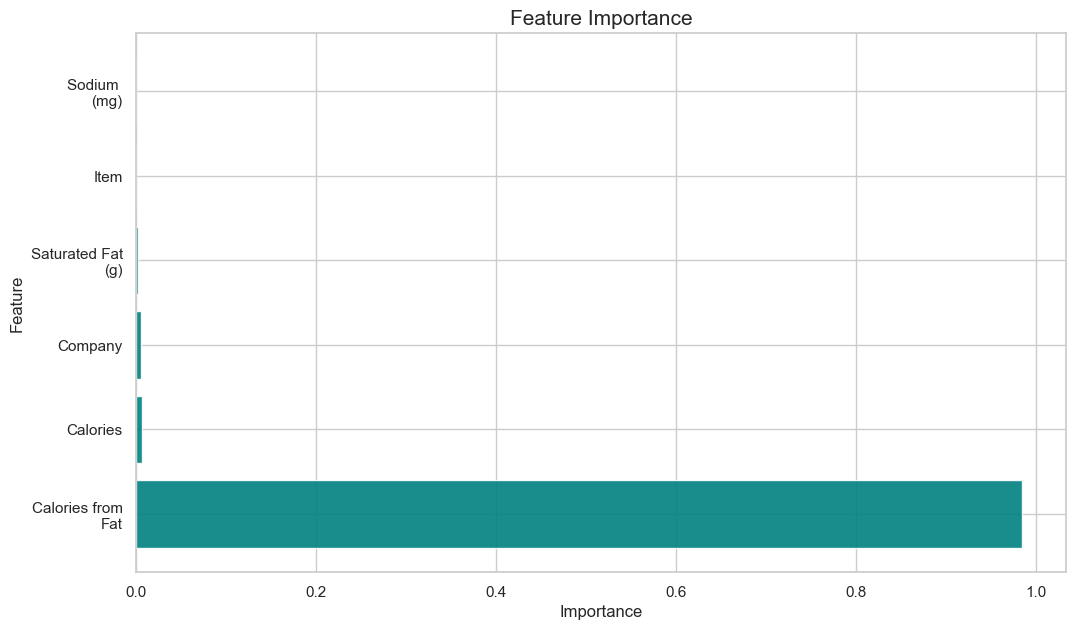

In [49]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.2f}")
plt.figure(figsize=(12, 7))
plt.barh(*zip(*sorted_feature_importance), alpha=0.9, color='teal')
plt.title('Feature Importance', fontsize=15)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()